# Star War Survey

### Introduction

In this project, we'll use Jupyter notebook and analyze data on the <i>Star Wars</i> movies

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: <b>does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?</b>

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [1]:
# import pandas, numpy and plt libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data with encoding "ISO-8859-1"
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
# Explore the data
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
# review column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Remove any rows of `RespondentID` is "NaN"

In [4]:
# keep rows where the RespondentID column is not null
star_wars = star_wars[star_wars["RespondentID"].notnull()]

# check again and confirm there's no null values in RespondentID any more
star_wars["RespondentID"].isnull().value_counts(dropna=False)

False    1186
Name: RespondentID, dtype: int64

### Cleaning and Mapping Yes/No Columns

Convert string "YES" & "NO" to boolean value for analysis. For the next two columns:

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent `YES/NO` quetions. They can also be `NaN` if respondent chooses not to answer a question. We'd like to convert the string value into boolean value `True/False` without having to do a string comparison.

After cleaning, both columns should only contain the values `True`, `False` and `NaN`.

In [5]:
# build a dictionary and map in the column
yes_no_dict = {
    "Yes":True, 
    "No":False
}

# assign variable "col_1" since column name is too long
col_1 = "Have you seen any of the 6 films in the Star Wars franchise?"

# use dictionary mapping to convert value
star_wars[col_1] = star_wars[col_1].map(yes_no_dict)
star_wars[col_1].value_counts(dropna=False) # check the distribution status


True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
# assign varaible "col_2" since column name is too long
col_2 = "Do you consider yourself to be a fan of the Star Wars film franchise?"

# mapping the same dictionary to convert value 
star_wars[col_2] = star_wars[col_2].map(yes_no_dict)
star_wars[col_2].value_counts(dropna=False) # check the distribution status


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Convert each columns name and values

For columns below, if the value in a cell is the name of the movie, that means the respondent have seen the movie before. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

For analysis purpose, we need to convert value in a cell into `True/False`, besides, column names are too complicated that we will rename them with `df.rename(columns=dict)`

In [7]:
# build a dictionary for converting values
# carefully check every value you need to map to avoid typo
mapping_dict = {
    "Star Wars: Episode I  The Phantom Menace":True,
    "Star Wars: Episode II  Attack of the Clones":True,
    "Star Wars: Episode III  Revenge of the Sith":True,
    "Star Wars: Episode IV  A New Hope":True,
    "Star Wars: Episode V The Empire Strikes Back":True,
    "Star Wars: Episode VI Return of the Jedi":True,
    np.NaN:False
}

# use a for-loop to map values one column by another
for i in range(3,9):
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(mapping_dict).copy()


In [8]:
# Check every colmun if all values were corrected as we expect
for i in range(3,9):
    print(star_wars.iloc[:,i].value_counts(dropna=False))
    print('-----------------------------') # separate the outcome

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
-----------------------------
False    615
True     571
Name: Unnamed: 4, dtype: int64
-----------------------------
False    636
True     550
Name: Unnamed: 5, dtype: int64
-----------------------------
True     607
False    579
Name: Unnamed: 6, dtype: int64
-----------------------------
True     758
False    428
Name: Unnamed: 7, dtype: int64
-----------------------------
True     738
False    448
Name: Unnamed: 8, dtype: int64
-----------------------------


In [9]:
# build a dictionary and use df.rename(columns=dict)
# to convert column names
rename_dict = {
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6",
}

star_wars = star_wars.rename(columns=rename_dict)
# check again if column name updated
print(star_wars.columns[3:9])

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


### Cleaning the Ranking Column

The next 6 columns ask the respondent to rank the Star Wars movies in order of least favorite(6) to most favorite(1). Fotunately, we only need to convert the value into numeric type.

Column names is too complicated so we need to rename with `ranking_1`, `ranking_2` and so on.

In [10]:
# Convert each of the column to float type
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)
# Check again if the value is float type now
for i in range(9,15):
    print(star_wars.iloc[:,i].value_counts())
    print('--------------------------------')

4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64
--------------------------------
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: Unnamed: 10, dtype: int64
--------------------------------
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: Unnamed: 11, dtype: int64
--------------------------------
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: Unnamed: 12, dtype: int64
--------------------------------
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: Unnamed: 13, dtype: int64
--------------------------------
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: Unnamed: 14, dtype: int64
--------------------------------


In [11]:
# build a dictionary and use df.rename(columns=dict)
# to convert column names
rename_dict_2 = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
    "Unnamed: 10":"ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14":"ranking_6"
}

    
star_wars = star_wars.rename(columns=rename_dict_2)
# check again if column names were corrected
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

### Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns. Since the values represent the ranking, we can calculate mean value to realize the ranking. <b>1</b> stands for "the best" while <b>6</b> stands for "the worst".

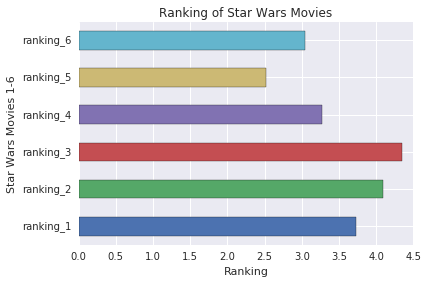

In [12]:
# select specified columns, calculate mean value
# make a horizontal bar plot to understand ranking easily
star_wars.iloc[:,9:15].mean().plot.barh(title=
                                       "Ranking of Star Wars Movies")
plt.ylabel("Star Wars Movies 1-6") 
plt.xlabel("Ranking")

plt.show()

In [13]:
# check the ranking mean value
rank_mean = star_wars.iloc[:,9:15].mean()
round(rank_mean,2)

ranking_1    3.73
ranking_2    4.09
ranking_3    4.34
ranking_4    3.27
ranking_5    2.51
ranking_6    3.05
dtype: float64

Remember that value 1 represents favorite and value 6 represents least favorite. The smaller the value is means the respondents love this movie more.

We have a conclusion that respondents love "Star Wars: Episode V The Empire Strikes Back" most(2.51), and love "Star Wars: Episode III  Revenge of the Sith" least(4.34).

### Finding the Most Viewed Movie

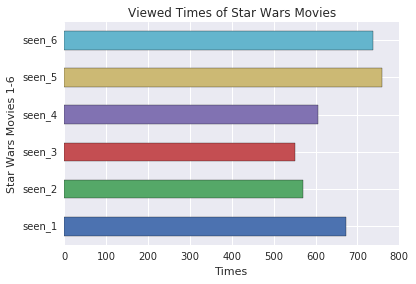

In [14]:
# select columns we need
# use sum() to calculate how many times they have seen the movie
# make a horizontal bar plot
star_wars.iloc[:,3:9].sum().plot.barh(title="Viewed Times of Star Wars Movies")
plt.ylabel("Star Wars Movies 1-6") 
plt.xlabel("Times")
plt.show()

In [15]:
# check the view sum value
view_sum = star_wars.iloc[:,3:9].sum()
view_sum

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

The distribution of viewing times looks like reverse of ranking plot, this can be understood since Episode 5 has the highest rank(2.51) and most viewed times, while Episode 3 has the lowest ranking(4.34) and lowest viewed times.

### Exploring the Data by Binary Segments

We'd like to split a dataframe into two groups by gender. Go deeper to analyze questions like "the most viewed movie", "the highest-ranked movie" and other statistic separately for each group.

In [16]:
# split a dataframe into two groups by gender
male = star_wars[star_wars["Gender"]=="Male"].copy()
female = star_wars[star_wars["Gender"]=="Female"].copy()

353.67 283.83


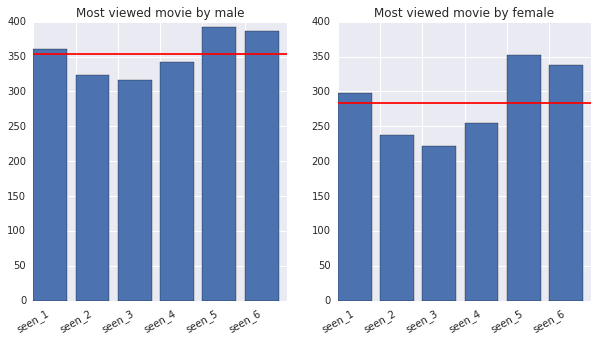

In [17]:
# find the most viewed movie by gender
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(range(1,7),male.iloc[:,3:9].sum())
ax2.bar(range(1,7),female.iloc[:,3:9].sum())
ax1.set_xticklabels(male.columns[3:9], rotation=30)
ax2.set_xticklabels(female.columns[3:9], rotation=30)
ax1.set_title("Most viewed movie by male")
ax2.set_title("Most viewed movie by female")

male_mean_sum = sum(male.iloc[:,3:9].sum())/6
female_mean_sum = sum(female.iloc[:,3:9].sum()/6)
print(round(male_mean_sum,2), round(female_mean_sum,2))

ax1.axhline(y=male_mean_sum, c='r')
ax2.axhline(y=female_mean_sum, c='r')

We can find both genders watched `Star Wars: Episode V The Empire Strikes Back` the most, and watched `Star Wars: Episode III Revenge of the Sith` the least.

For male, the average times they saw these 6 movies is 353.67 which is more than those of female 283.83. Besides, the difference between top and bottom in male is quite smaller than female.

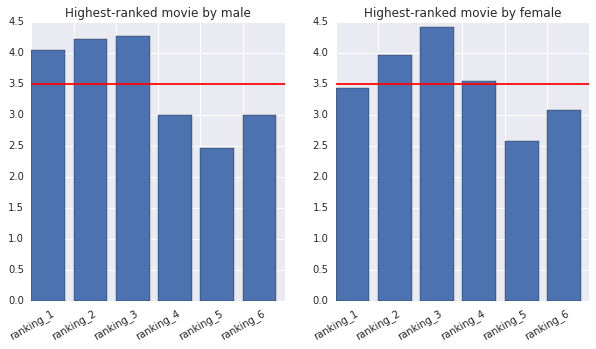

3.5 3.5


In [18]:
# find the highest-ranked movie
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(range(1,7),male.iloc[:,9:15].mean())
ax2.bar(range(1,7),female.iloc[:,9:15].mean())
ax1.set_xticklabels(male.columns[9:15], rotation=30)
ax2.set_xticklabels(female.columns[9:15], rotation=30)
ax1.set_title("Highest-ranked movie by male")
ax2.set_title("Highest-ranked movie by female")

male_mean_ranking = sum(male.iloc[:,9:15].mean())/6
female_mean_ranking = sum(female.iloc[:,9:15].mean())/6
ax1.axhline(y=male_mean_ranking, c='r')
ax2.axhline(y=female_mean_ranking, c='r')
plt.show()

print(round(male_mean_ranking,2), round(female_mean_ranking,2))

The lower in ranked column, respondents love the moview more. You can see average ranking for both gender is almostthe same.


We can find both genders love `Star Wars: Episode V The Empire Strikes Back` the most and the least for `Star Wars: Episode III Revenge of the Sith`.

We find one thing interesting, male loves `Star Wars: Episode I  The Phantom Menace` about 0.5 more than female, while female loves `Star Wars: Episode IV  A New Hope` about 0.5 more than male.

Maybe if we look deeper in movie content and we can realize the reasons make this difference.

### Explore more on `Education`, `Location (Census Region)` and `Which character shot first?`

In [19]:
# make a copy to avoid changing original dataset
star_wars_1 = star_wars.copy()

In [20]:
# review the value distribution of Education
star_wars_1["Education"].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [21]:
# Since only 7 respondent are less than high school degree
# we'd like to combine them with high school

star_wars_1 = star_wars_1.replace(
    "Less than high school degree", "High school degree or less").replace(
    "High school degree","High school degree or less")
star_wars_1["Education"].value_counts()


Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree or less          112
Name: Education, dtype: int64

In [22]:
# split data into 4 groups by education degree
graduate = star_wars_1[star_wars["Education"]=="Graduate degree"]
bachelor = star_wars_1[star_wars_1["Education"]=="Bachelor degree"]
college = star_wars_1[star_wars["Education"]=="Some college or Associate degree"]
high_school = star_wars_1[star_wars_1["Education"]=="High school degree or less"]


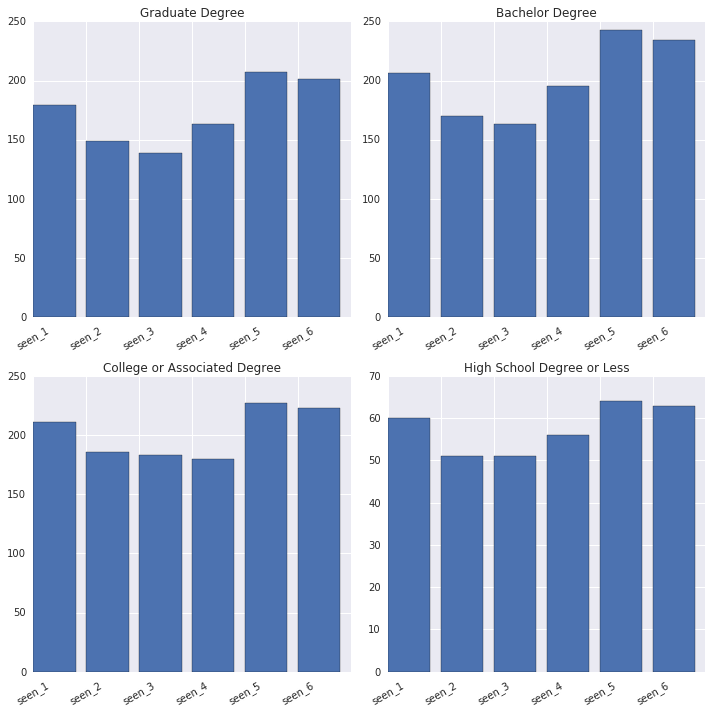

In [23]:
# find the most-viewed movie by education degree
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.bar(range(1,7),graduate.iloc[:,3:9].sum())
ax2.bar(range(1,7),bachelor.iloc[:,3:9].sum())
ax3.bar(range(1,7),college.iloc[:,3:9].sum())
ax4.bar(range(1,7),high_school.iloc[:,3:9].sum())
ax1.set_xticklabels(graduate.columns[3:9], rotation=30)
ax2.set_xticklabels(bachelor.columns[3:9], rotation=30)
ax3.set_xticklabels(college.columns[3:9], rotation=30)
ax4.set_xticklabels(high_school.columns[3:9], rotation=30)
ax1.set_title("Graduate Degree")
ax2.set_title("Bachelor Degree")
ax3.set_title("College or Associated Degree")
ax4.set_title("High School Degree or Less")
plt.tight_layout()
plt.show()

For respondents who are graduate degree and bachelor degree, most of them have seen episode 1, 4, 5 and 6 and fewer have seen episode 2 and 4.

However, for respondents who are college degree and high school or less degree, they've seen every episode which is very different from previous group.

Maybe we should go deeper for age of respondent to find relationship. Let's find out the age distribution who've seen episode 3 by education degree below.

In [24]:
# Look over the age distribution of each diplomatic degree
# who have seen episode 3
# Graduate
graduate[graduate["seen_3"] == True]["Age"].value_counts(normalize=True)*100

45-60    35.971223
30-44    34.532374
> 60     18.705036
18-29    10.791367
Name: Age, dtype: float64

In [25]:
# Bachelor
bachelor[bachelor["seen_3"] == True]["Age"].value_counts(normalize=True)*100

45-60    31.901840
18-29    30.061350
30-44    25.153374
> 60     12.883436
Name: Age, dtype: float64

In [26]:
# College
college[college["seen_3"] == True]["Age"].value_counts(normalize=True)*100

18-29    32.240437
30-44    25.136612
> 60     24.590164
45-60    18.032787
Name: Age, dtype: float64

In [27]:
# high school or less
high_school[high_school["seen_3"] == True]["Age"].value_counts(normalize=True)*100

18-29    39.215686
30-44    33.333333
> 60     13.725490
45-60    13.725490
Name: Age, dtype: float64

Among college and high school degree, the most respondents age who've seen episode 3 lie in 18-29 and 30-44.

For bachelor degree, the respondents age who've seen episode 3 are 45-60 and 18-29. For graduate degree, 30-60 years old respondents have seen episode 3.


### Which character shot first?

["<b>Han shot first<b>"](https://en.wikipedia.org/wiki/Han_shot_first) refers to a controversial change made to a scene in the science fiction action film Star Wars (1977), in which Han Solo (Harrison Ford) is confronted by the bounty hunter Greedo (Paul Blake) in the Mos Eisley cantina. In the original version of the scene, Han shoots Greedo dead. Later versions are edited so that Greedo attempts to fire at Han first. Director George Lucas altered the scene to give Solo more justification for acting in self-defense. Many fans and commentators oppose the change, feeling it weakens Solo's character. The controversy is referenced in the 2018 film Solo: A Star Wars Story. (from Wikipedia)

In [28]:
# research who shot first and review the distribution first
star_wars_1["Which character shot first?"].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [50]:
# we'd like to remove null value
star_wars_1["Which character shot first?"].replace("I don't understand this question", np.NaN, inplace=True)

shot_first = star_wars_1["Which character shot first?"]
# drop the null value
shot_first.dropna()
# check again
shot_first.value_counts()

Han       325
Greedo    197
Name: Which character shot first?, dtype: int64

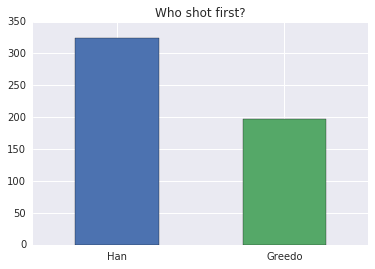

In [51]:
# plt.bar(shot_first,title="Who shot first?")
shot_first.value_counts().plot.bar(title="Who shot first?",rot=0)


Most of people believe it's Han shot first more than Greedo.

We'd like to look into deeper the correlation of different ages.

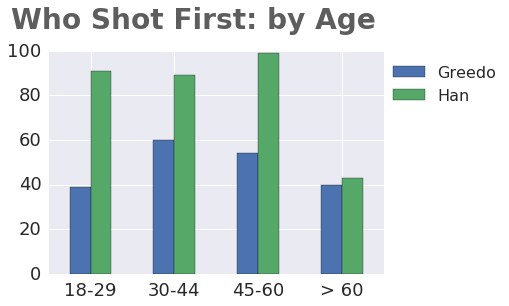

In [71]:
# Which character shot first by age
shoot = star_wars_1.groupby("Age")["Which character shot first?"].value_counts().unstack()

# plot
ax12 = shoot.plot(kind='bar',rot=0)

# Tick params
ax12.tick_params(labelsize=18)

# remove x label
ax12.set_xlabel("")

# Legend
ax12.legend(
    frameon=False,fontsize=16, bbox_to_anchor=(1.38, 1)
)

font_title = {"size": 28, "weight": "bold", "alpha": 0.75}
# Title
ax12.text(x=-0.95, y=110, s="Who Shot First: by Age", fontdict=font_title)

As we can see in the plot, 60+ people can't tell which version is model. Maybe they spent a lot of time thinking which is correct or maybe they really believe Greedo shot first...